# Favorite Programming Languages: Data Structures and Visualization

This notebook demonstrates basic Python data structures and visualization by listing favorite programming languages and plotting their popularity.

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
from datasets import load_dataset

ds = load_dataset("smartcat/Amazon_Clothing_Shoes_and_Jewelry_2023")


C:\Users\kuruv\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\kuruv\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kuruv\.cache\huggingface\hub\datasets--smartcat--Amazon_Clothing_Shoes_and_Jewelry_2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as

C:\Users\kuruv\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sampled 10000 reviews for faster processing.
Total reviews (sample): 10000
Reviews mentioning size/fit/look issues (sample): 5468 (54.68%)


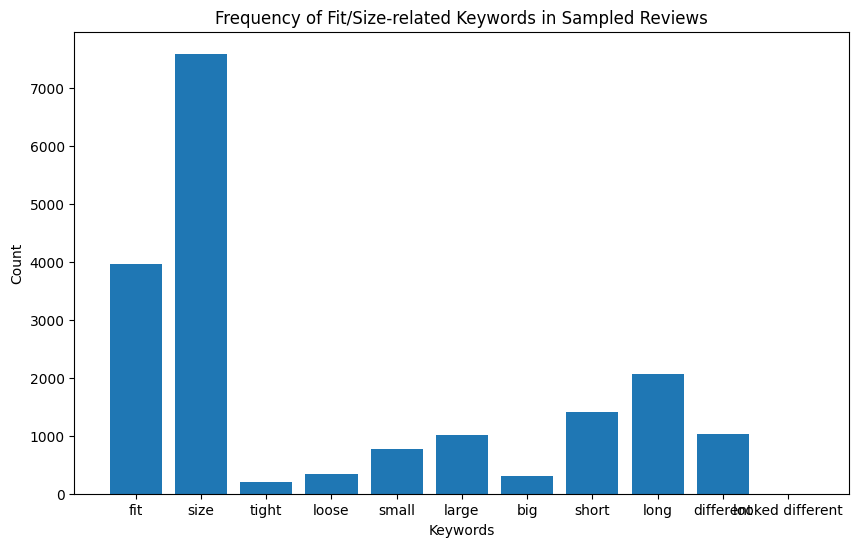

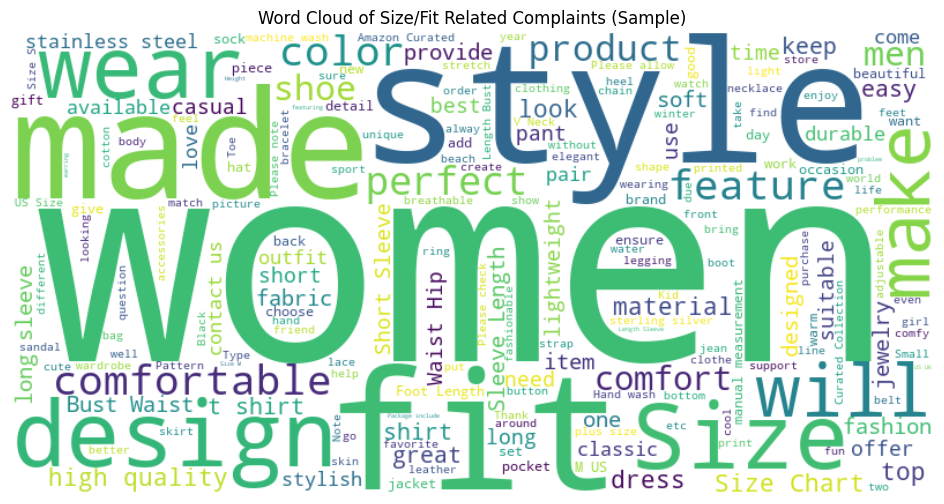

In [2]:
# Sample a smaller subset for faster processing (e.g., 10,000 reviews)
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import load_dataset

ds = load_dataset("smartcat/Amazon_Clothing_Shoes_and_Jewelry_2023")
df = ds['train'].to_pandas()

# Try to find the review text column
df_columns = df.columns.tolist()
possible_names = ['reviewText', 'review_body', 'review', 'text', 'content', 'body', 'description']
review_col = None
for name in possible_names:
    if name in df_columns:
        review_col = name
        break
if review_col is None:
    for col in df_columns:
        if df[col].dtype == object:
            review_col = col
            print(f"Using fallback column: {review_col}")
            break
if review_col is None:
    raise ValueError('No review text column found!')
df['text'] = df[review_col].astype(str)

keywords = ["fit", "size", "tight", "loose", "small", "large", "big", "short", "long", "different", "looked different"]
def check_issue(text):
    text = text.lower()
    return any(kw in text for kw in keywords)

sample_size = 10000  # You can adjust this number as needed
sample_df = df.sample(n=sample_size, random_state=42)

print(f"Sampled {len(sample_df)} reviews for faster processing.")

sample_df["size_issue"] = sample_df["text"].apply(check_issue)

issue_count = sample_df["size_issue"].sum()
total_reviews = len(sample_df)
percent = (issue_count / total_reviews) * 100
print(f"Total reviews (sample): {total_reviews}")
print(f"Reviews mentioning size/fit/look issues (sample): {issue_count} ({percent:.2f}%)")

word_counts = {}
for kw in keywords:
    word_counts[kw] = sample_df["text"].str.lower().str.count(kw).sum()

plt.figure(figsize=(10,6))
plt.bar(word_counts.keys(), word_counts.values())
plt.title("Frequency of Fit/Size-related Keywords in Sampled Reviews")
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.show()

issue_reviews = " ".join(sample_df[sample_df["size_issue"]]["text"].tolist())
wc = WordCloud(width=800, height=400, background_color="white").generate(issue_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Size/Fit Related Complaints (Sample)")
plt.show()

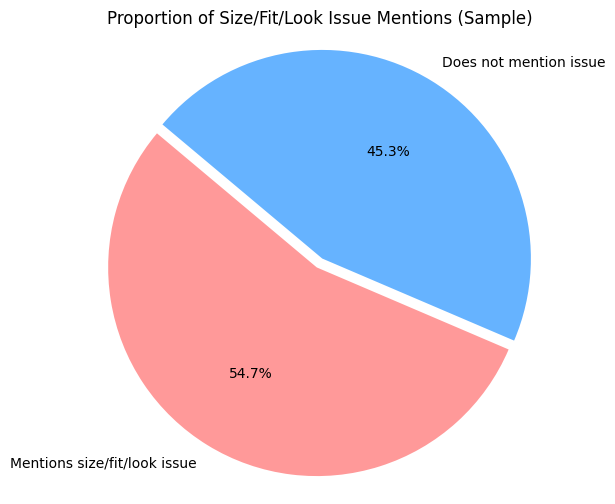

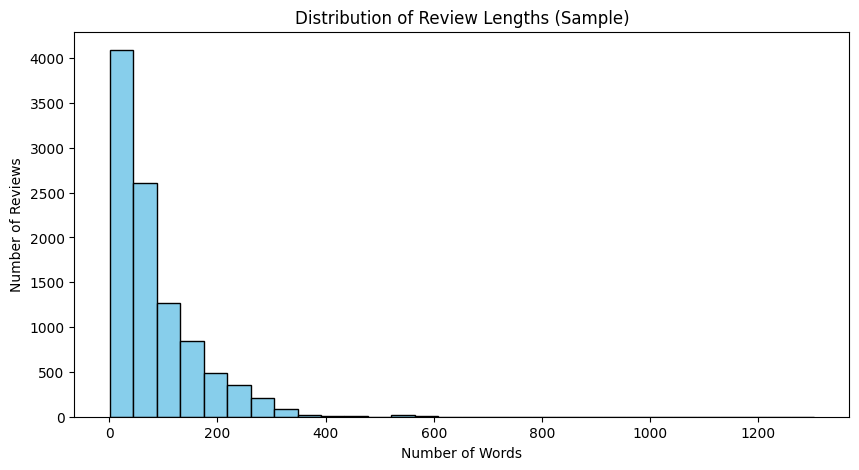

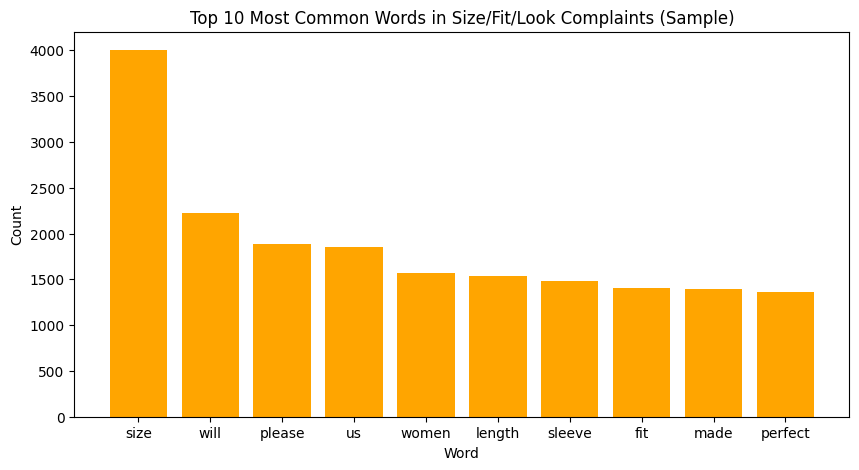

In [3]:
# Additional visualizations: Pie chart and histogram
import matplotlib.pyplot as plt

# Pie chart: Proportion of reviews mentioning size/fit/look issues
labels = ['Mentions size/fit/look issue', 'Does not mention issue']
sizes = [issue_count, total_reviews - issue_count]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05,0))
plt.title('Proportion of Size/Fit/Look Issue Mentions (Sample)')
plt.axis('equal')
plt.show()

# Histogram: Distribution of review lengths (words)
sample_df['review_length'] = sample_df['text'].str.split().apply(len)
plt.figure(figsize=(10,5))
plt.hist(sample_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Sample)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

# Bar chart: Top 10 most common words in size/fit/look complaints
from collections import Counter
from wordcloud import STOPWORDS

all_words = ' '.join(sample_df[sample_df['size_issue']]['text'].tolist()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in STOPWORDS]
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(10)
words, counts = zip(*most_common)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='orange')
plt.title('Top 10 Most Common Words in Size/Fit/Look Complaints (Sample)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mansithummar67/flipkart-product-review-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.89M/3.89M [00:05<00:00, 746kB/s]

Extracting files...


Path to dataset files: C:\Users\kuruv\.cache\kagglehub\datasets\mansithummar67\flipkart-product-review-dataset\versions\5


Files in dataset folder: ['flipkart_product.csv']
Using CSV file: C:/Users/kuruv/.cache/kagglehub/datasets/mansithummar67/flipkart-product-review-dataset/versions/5\flipkart_product.csv
utf-8 decode failed, trying latin1 encoding...
Using fallback review column: ProductName
No category/product column found. Using all reviews.
Using fallback review column: ProductName
No category/product column found. Using all reviews.


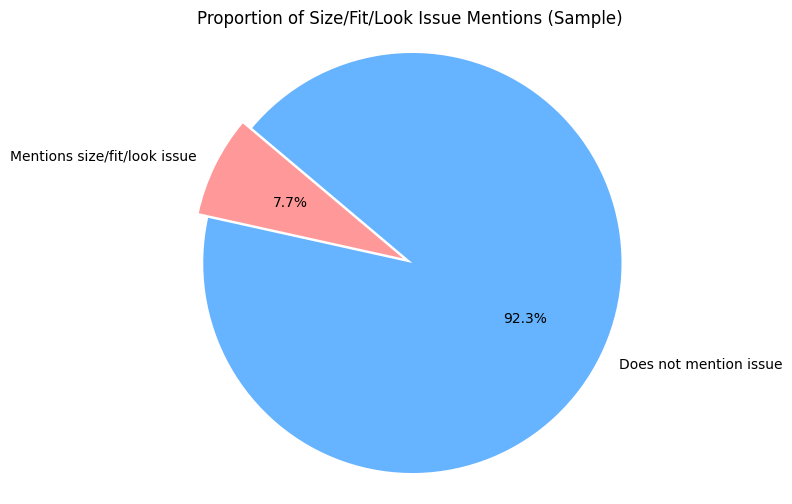

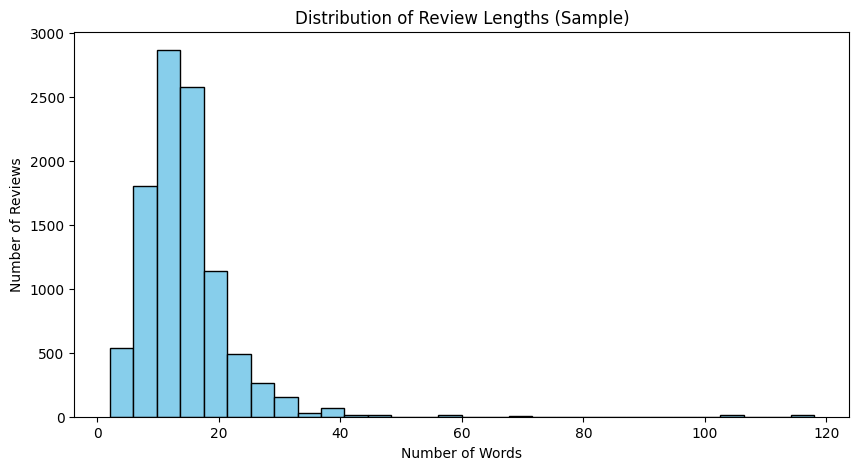

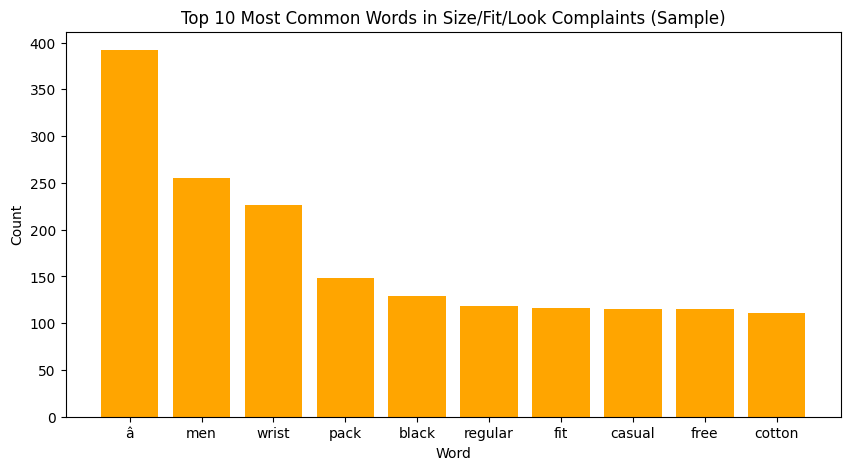

In [20]:
# Flipkart product review analysis: filter for clothing/fashion reviews and visualize size/fit/look complaints
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import os

# Set the path to the new dataset folder
base_dir = r'C:/Users/kuruv/.cache/kagglehub/datasets/mansithummar67/flipkart-product-review-dataset/versions/5'
files = os.listdir(base_dir)
print('Files in dataset folder:', files)

# Try to find a CSV file
csv_files = [f for f in files if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError('No CSV file found in the dataset folder.')
csv_filename = os.path.join(base_dir, csv_files[0])
print('Using CSV file:', csv_filename)

# Load the dataset, try utf-8 then latin1 encoding
try:
    df = pd.read_csv(csv_filename)
except UnicodeDecodeError:
    print('utf-8 decode failed, trying latin1 encoding...')
    df = pd.read_csv(csv_filename, encoding='latin1')
except Exception as e:
    print(f'Error loading file: {e}')
    raise

# Try to find the review text and product/category columns
possible_review_names = ['reviewText', 'review_body', 'review', 'text', 'content', 'body', 'description', 'comments']
possible_category_names = ['category', 'product_category', 'productType', 'product_type', 'product', 'product_name', 'product_title', 'title', 'name']
df_columns = df.columns.tolist()
review_col = None
category_col = None
for name in possible_review_names:
    if name in df_columns:
        review_col = name
        break
for name in possible_category_names:
    if name in df_columns:
        category_col = name
        break
if review_col is None:
    for col in df_columns:
        if df[col].dtype == object:
            review_col = col
            print(f"Using fallback review column: {review_col}")
            break
if review_col is None:
    raise ValueError('No review text column found!')
df['text'] = df[review_col].astype(str)

# Filter for clothing/fashion reviews if possible
if category_col:
    clothing_keywords = ['cloth', 'fashion', 'apparel', 'shirt', 'pant', 'jean', 'dress', 'kurta', 'saree', 'tshirt', 't-shirt', 'top', 'lehenga', 'salwar', 'jacket', 'suit', 'skirt', 'blouse', 'trouser', 'sweater', 'hoodie', 'shorts', 'leggings', 'churidar', 'dupatta', 'gown', 'ethnic', 'wear', 'footwear', 'shoe', 'sandal', 'slipper', 'boot']
    mask = df[category_col].astype(str).str.lower().apply(lambda x: any(kw in x for kw in clothing_keywords))
    df = df[mask]
    print(f"Filtered to {len(df)} clothing/fashion reviews.")
else:
    print("No category/product column found. Using all reviews.")

# Define keywords for size/fit/look complaints
keywords = ["fit", "size", "tight", "loose", "small", "large", "big", "short", "long", "different", "looked different"]
def check_issue(text):
    text = str(text).lower()
    return any(kw in text for kw in keywords)

# Sample for performance (adjust as needed)
sample_size = min(10000, len(df))
sample_df = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df.copy()

sample_df["size_issue"] = sample_df["text"].apply(check_issue)
issue_count = sample_df["size_issue"].sum()
total_reviews = len(sample_df)

# Pie chart: Proportion of reviews mentioning size/fit/look issues
labels = ['Mentions size/fit/look issue', 'Does not mention issue']
sizes = [issue_count, total_reviews - issue_count]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05,0))
plt.title('Proportion of Size/Fit/Look Issue Mentions (Sample)')
plt.axis('equal')
plt.show()

# Histogram: Distribution of review lengths (words)
sample_df['review_length'] = sample_df['text'].str.split().apply(len)
plt.figure(figsize=(10,5))
plt.hist(sample_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Sample)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

# Bar chart: Top 10 most common words in size/fit/look complaints
all_words = ' '.join(sample_df[sample_df['size_issue']]['text'].tolist()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in STOPWORDS]
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(10)
if most_common:
    words, counts = zip(*most_common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='orange')
    plt.title('Top 10 Most Common Words in Size/Fit/Look Complaints (Sample)')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()
else:
    print('No common words found in complaints.')


In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/consumer-review-of-clothing-product")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kuruv\.cache\kagglehub\datasets\jocelyndumlao\consumer-review-of-clothing-product\versions\1


In [27]:
# Jocelyn Dumlao clothing product review analysis: auto-detect file type and load data (with subfolder support)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import os

# Set the path to the new dataset folder
base_dir = r'C:/Users/kuruv/.cache/kagglehub/datasets/jocelyndumlao/consumer-review-of-clothing-product/versions/1'
files = os.listdir(base_dir)
print('Files in dataset folder:', files)

# If the folder contains only one subdirectory, look inside it
if len(files) == 1 and os.path.isdir(os.path.join(base_dir, files[0])):
    base_dir = os.path.join(base_dir, files[0])
    files = os.listdir(base_dir)
    print('Files in subfolder:', files)

# Try to find a CSV, XLSX, or JSON file
csv_files = [f for f in files if f.lower().endswith('.csv')]
xlsx_files = [f for f in files if f.lower().endswith('.xlsx')]
json_files = [f for f in files if f.lower().endswith('.json')]

if csv_files:
    data_file = os.path.join(base_dir, csv_files[0])
    print('Using CSV file:', data_file)
    try:
        df = pd.read_csv(data_file)
    except UnicodeDecodeError:
        print('utf-8 decode failed, trying latin1 encoding...')
        df = pd.read_csv(data_file, encoding='latin1')
elif xlsx_files:
    data_file = os.path.join(base_dir, xlsx_files[0])
    print('Using Excel file:', data_file)
    df = pd.read_excel(data_file)
elif json_files:
    data_file = os.path.join(base_dir, json_files[0])
    print('Using JSON file:', data_file)
    df = pd.read_json(data_file)
else:
    raise FileNotFoundError('No CSV, Excel, or JSON file found in the dataset folder.')

# ...rest of your analysis code...

Files in dataset folder: ['Consumer Review of Clothing Product']
Files in subfolder: ['data_amazon.xlsx - Sheet1.csv']
Using CSV file: C:/Users/kuruv/.cache/kagglehub/datasets/jocelyndumlao/consumer-review-of-clothing-product/versions/1\Consumer Review of Clothing Product\data_amazon.xlsx - Sheet1.csv


Using fallback review column: Title
No category/product column found. Using all reviews.


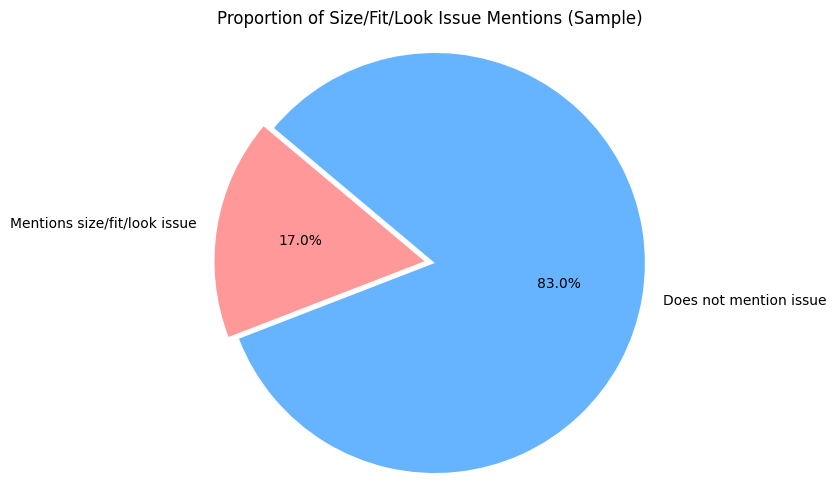

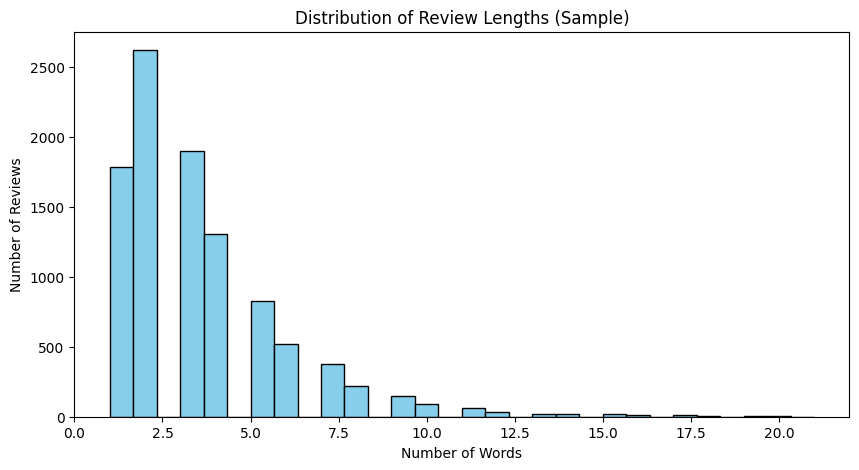

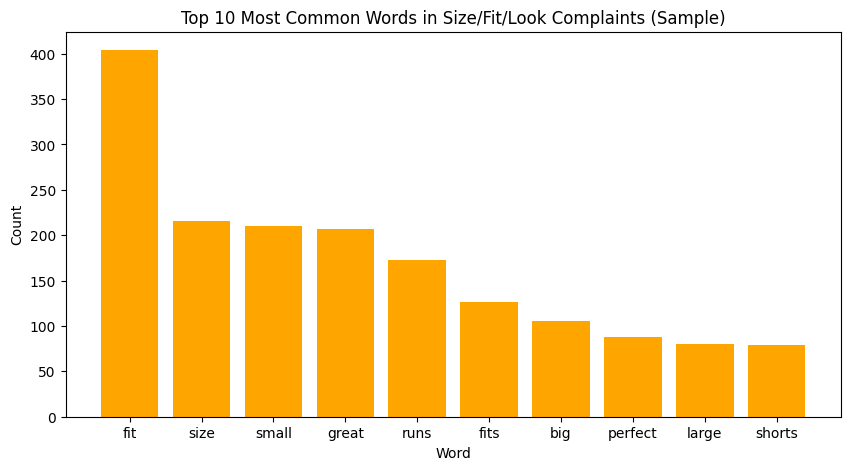

In [28]:
# Try to find the review text and product/category columns
possible_review_names = ['reviewText', 'review_body', 'review', 'text', 'content', 'body', 'description', 'comments']
possible_category_names = ['category', 'product_category', 'productType', 'product_type', 'product', 'product_name', 'product_title', 'title', 'name']
df_columns = df.columns.tolist()
review_col = None
category_col = None
for name in possible_review_names:
    if name in df_columns:
        review_col = name
        break
for name in possible_category_names:
    if name in df_columns:
        category_col = name
        break
if review_col is None:
    for col in df_columns:
        if df[col].dtype == object:
            review_col = col
            print(f"Using fallback review column: {review_col}")
            break
if review_col is None:
    raise ValueError('No review text column found!')
df['text'] = df[review_col].astype(str)

# Filter for clothing/fashion reviews if possible
if category_col:
    clothing_keywords = ['cloth', 'fashion', 'apparel', 'shirt', 'pant', 'jean', 'dress', 'kurta', 'saree', 'tshirt', 't-shirt', 'top', 'lehenga', 'salwar', 'jacket', 'suit', 'skirt', 'blouse', 'trouser', 'sweater', 'hoodie', 'shorts', 'leggings', 'churidar', 'dupatta', 'gown', 'ethnic', 'wear', 'footwear', 'shoe', 'sandal', 'slipper', 'boot']
    mask = df[category_col].astype(str).str.lower().apply(lambda x: any(kw in x for kw in clothing_keywords))
    df = df[mask]
    print(f"Filtered to {len(df)} clothing/fashion reviews.")
else:
    print("No category/product column found. Using all reviews.")

# Define keywords for size/fit/look complaints
keywords = ["fit", "size", "tight", "loose", "small", "large", "big", "short", "long", "different", "looked different"]
def check_issue(text):
    text = str(text).lower()
    return any(kw in text for kw in keywords)

# Sample for performance (adjust as needed)
sample_size = min(10000, len(df))
sample_df = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df.copy()

sample_df["size_issue"] = sample_df["text"].apply(check_issue)
issue_count = sample_df["size_issue"].sum()
total_reviews = len(sample_df)

# Pie chart: Proportion of reviews mentioning size/fit/look issues
labels = ['Mentions size/fit/look issue', 'Does not mention issue']
sizes = [issue_count, total_reviews - issue_count]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05,0))
plt.title('Proportion of Size/Fit/Look Issue Mentions (Sample)')
plt.axis('equal')
plt.show()

# Histogram: Distribution of review lengths (words)
sample_df['review_length'] = sample_df['text'].str.split().apply(len)
plt.figure(figsize=(10,5))
plt.hist(sample_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Sample)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

# Bar chart: Top 10 most common words in size/fit/look complaints
all_words = ' '.join(sample_df[sample_df['size_issue']]['text'].tolist()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in STOPWORDS]
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(10)
if most_common:
    words, counts = zip(*most_common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='orange')
    plt.title('Top 10 Most Common Words in Size/Fit/Look Complaints (Sample)')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()
else:
    print('No common words found in complaints.')